In [2]:
import cairo
import IPython.display
from io import BytesIO
import numpy as np

class Display():
    def __init__(self, w, h):
        self.svgio = BytesIO()
        self.w = w
        self.h = h
        
    def __enter__(self):
        surface = cairo.SVGSurface(self.svgio, self.w, self.h)
        context = cairo.Context(surface)
        self.surface = surface
        self.context = context
        return self.context
    
    def show(self):
        self.surface.finish()
        self.surface.flush()
        return IPython.display.SVG(data=self.svgio.getvalue())
        
    def __exit__(self, type, value, traceback):
        pass

In [3]:
def diamond_grid_pos(w, h, size):
    x1 = np.concatenate([np.full(h + 1, 0), np.arange(size, w * size, size)])
    y1 = np.concatenate([np.arange(0, h * size, size), np.full(w, h * size)])
    x2 = np.concatenate([np.arange(0, w * size, size), np.full(h, w * size)])
    y2 = np.concatenate([np.full(w, 0), np.arange(0, size * h, size)])
    return np.array([x1, y1, x2, y2]).T

def diamond_grid_neg(w, h, size):
    x1 = np.concatenate([np.full(h + 1, 0), np.arange(size, w * size, size)])
    y1 = np.concatenate([np.arange(h * size, 0, -size), np.full(w, 0)])
    x2 = np.concatenate([np.arange(0, w * size, size), np.full(h, w * size)])
    y2 = np.concatenate([np.full(w, h * size), np.arange(h * size, 0, -size)])
    return np.array([x1, y1, x2, y2]).T

def diamond_grid(w, h, size):
    return np.concatenate([
        diamond_grid_pos(w, h, size),
        diamond_grid_neg(w, h, size)
    ])

def square_grid(w, h, size):
    hor_x1 = np.full(h + 1, 0)
    hor_x2 = np.full(h + 1, w * size)
    hor_y1 = np.arange(0, (h + 1) * size, size)
    hor_y2 = hor_y1
    
    ver_x1 = np.arange(0, (w + 1) * size, size)
    ver_x2 = ver_x1
    ver_y1 = np.full(w + 1, 0)
    ver_y2 = np.full(w + 1, h * size)
    
    return np.concatenate([
            np.array([hor_x1, hor_y1, hor_x2, hor_y2]).T,
            np.array([ver_x1, ver_y1, ver_x2, ver_y2]).T
        ])

def draw_simple_lines(context, lines):
    for row in lines:
        x1, y1, x2, y2 = tuple(row)
        context.move_to(x1, y1)
        context.line_to(x2, y2)
        context.stroke()
        
# https://gist.github.com/kylemcdonald/6132fc1c29fd3767691442ba4bc84018
# intersection between line(p1, p2) and line(p3, p4)
def intersect(p1, p2, p3, p4):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    x4,y4 = p4
    denom = (y4-y3)*(x2-x1) - (x4-x3)*(y2-y1)
    if denom == 0: # parallel
        return None
    ua = ((x4-x3)*(y1-y3) - (y4-y3)*(x1-x3)) / denom
    if ua < 0 or ua > 1: # out of range
        return None
    ub = ((x2-x1)*(y1-y3) - (y2-y1)*(x1-x3)) / denom
    if ub < 0 or ub > 1: # out of range
        return None
    x = x1 + ua * (x2-x1)
    y = y1 + ua * (y2-y1)
    return (x,y)

In [4]:
def of_multiples(across, down):
    direction = 0
    x = 0
    while True:
        x1 = x
        x2 = x1 + across
        yield ()

def of_order():
    pass

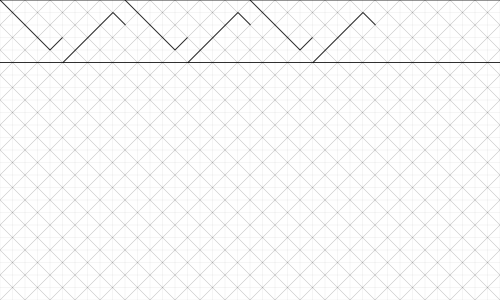

In [30]:
cols = 20
rows = 12
size = 25

display = Display(cols * size, rows * size)

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    # top
    context.move_to(0 * size, 0 * size)
    context.line_to(20 * size, 0 * size)
    context.stroke()
    
    # bottom
    context.move_to(0 * size, 2.5 * size)
    context.line_to(20 * size, 2.5 * size)
    context.stroke()
    
    for i in range(3):
        x = i * size * 5
        # down
        context.move_to(x + 0 * size, 0 * size)
        context.line_to(x + 2 * size, 2 * size)
        context.stroke()
        
        context.move_to(x + 2 * size, 2 * size)
        context.line_to(x + 2.5 * size, 1.5 * size)
        context.stroke()

        # up
        x += 0.5
        context.move_to(x + 2.5 * size, 2.5 * size)
        context.line_to(x + 4.5 * size, .5 * size)
        context.stroke()

        context.move_to(x + 4.5 * size, .5 * size)
        context.line_to(x + 5 * size, 1 * size)
        context.stroke()
    

display.show()